In [42]:
import pandas as pd
df= pd.read_csv('/content/banknote_dataset.csv')
df.head()



,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [43]:
## check for info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


In [44]:
#data shape
df.shape

(1372, 2)

In [45]:
## description of the data
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


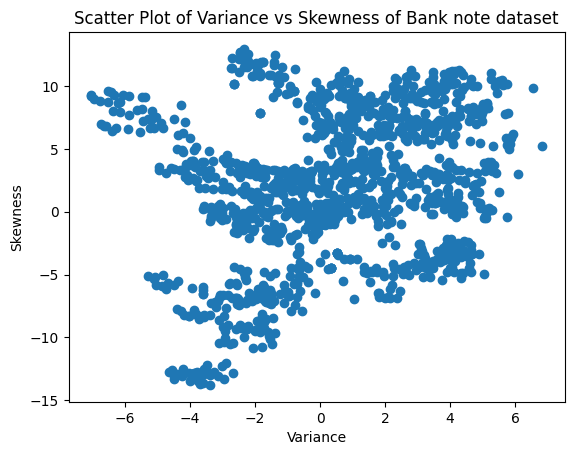

In [46]:

#visualizing raw data
import matplotlib.pyplot as plt
plt.scatter(df.V1, df.V2)
plt.title('Scatter Plot of Variance vs Skewness of Bank note dataset')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[0.37032586 0.44841236]
 [0.67423251 0.6984855 ]]


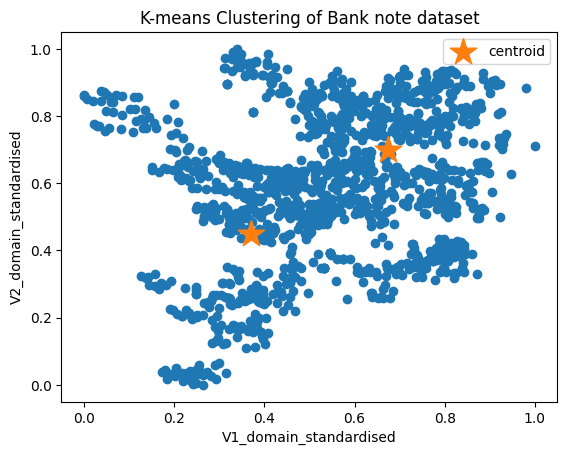

In [55]:

import numpy as np
from sklearn.cluster import KMeans

V1_mean=df['V1'].mean()
V2_mean=df['V2'].mean()
V1_std=df['V1'].std()
V2_std=df['V2'].std()
V1_max=df['V1'].max()
V2_max=df['V2'].max()
V1_min=df['V1'].min()
V2_min=df['V2'].min()

# normalisation: the data will now have
# a mean of 0 and a standard deviation of 1
V1_normed=(df['V1']-V1_mean)/V1_std
V2_normed=(df['V2']-V2_mean)/V2_std

# domain standardisation: the data points will all lie
# between 0 (smallest one) and 1 (largest one)
V1_domain_standardised=(df['V1']-V1_min)/(V1_max-V1_min)
V2_domain_standardised=(df['V2']-V2_min)/(V2_max-V2_min)
#k-means clustering steps
V1_V2_domain_standardised=np.column_stack((V1_domain_standardised,V2_domain_standardised))
#print(V1_V2_domain_standardised)
km_res=KMeans(n_clusters=2).fit((V1_V2_domain_standardised))
clusters=km_res.cluster_centers_
print(clusters)
plt.scatter(V1_domain_standardised,V2_domain_standardised)
plt.scatter(clusters[:,0],clusters[:,1],s=400,marker='*',label='centroid')
plt.xlabel('V1_domain_standardised')
plt.ylabel('V2_domain_standardised')
plt.title('K-means Clustering of Bank note dataset')
plt.legend()
plt.show()


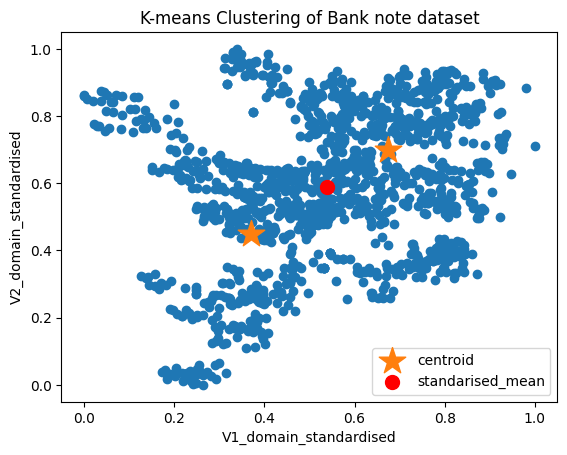

In [56]:
mean_V1_domain_standardised=np.mean(V1_domain_standardised)
mean_V1_domain_standardised
mean_V2_domain_standardised=np.mean(V2_domain_standardised)
std_V1_domain_standardised=np.std(V1_domain_standardised)
std_V2_domain_standardised=np.std(V2_domain_standardised)
#print(mean_V1_domain_standardised,mean_V2_domain_standardised,std_V1_domain_standardised,std_V2_domain_standardised)
plt.scatter(V1_domain_standardised,V2_domain_standardised)
plt.scatter(clusters[:,0],clusters[:,1],s=400,marker='*',label='centroid')
plt.scatter(mean_V1_domain_standardised,mean_V2_domain_standardised,s=100,marker='o',c='r',label='standarised_mean')
plt.xlabel('V1_domain_standardised')
plt.ylabel('V2_domain_standardised')
plt.title('K-means Clustering of Bank note dataset')

plt.legend()
plt.show()


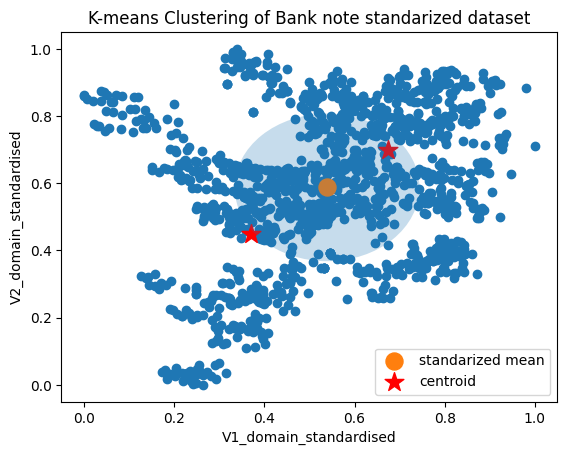

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse # Import Ellipse directly



ellipse = Ellipse((mean_V1_domain_standardised, mean_V2_domain_standardised),
                  2*std_V1_domain_standardised, 2*std_V2_domain_standardised,alpha=0.25) # Use Ellipse function to find outliers(out of the ellipse)

fig, graph = plt.subplots()
graph.scatter(V1_domain_standardised, V2_domain_standardised) #ploting standarized V1,V2
graph.scatter(mean_V1_domain_standardised, mean_V2_domain_standardised,s=150,label='standarized mean') #ploting mean of standarized V1,V2
graph.scatter(clusters[:,0],clusters[:,1],s=200,marker='*',c='r',label='centroid')  #ploting centroids resulted from k-means clustering that are inside the ellipse

graph.add_patch(ellipse)  # Add the ellipse to the graph
plt.xlabel('V1_domain_standardised')
plt.ylabel('V2_domain_standardised')
plt.title('K-means Clustering of Bank note standarized dataset')
plt.legend()
plt.show()